In [43]:
## importing the required packages
from time import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, ensemble,
             discriminant_analysis, random_projection)
import os
import cv2
from PIL import Image
import random

def copy_files(src_path,dest_path):
    files=os.listdir(src_path)
    while True:
        if len(os.listdir(dest_path))>=412:
            break
        i=random.randint(0,len(os.listdir(src_path))-1)
        img_file=files[i]
        img_path=os.path.join(src_path,img_file)
        img=cv2.imread(img_path)
        img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        img=Image.fromarray(img)
        frame_draw=img.copy()
        frame=img.resize((100,100), Image.BILINEAR)
        img_dest_path=os.path.join(dest_path,img_file)
        frame.save(img_dest_path)
        
path1=r'C:\Users\occisor\Downloads\Engagement_recognition\wacv2016-master\1'
path2=r'C:\Users\occisor\Downloads\Engagement_recognition\wacv2016-master\2'
path3=r'C:\Users\occisor\Downloads\Engagement_recognition\wacv2016-master\3'
dest_path1=r'C:\Users\occisor\Downloads\Engagement_recognition\wacv2016-master\dataset\1'
dest_path2=r'C:\Users\occisor\Downloads\Engagement_recognition\wacv2016-master\dataset\2'
dest_path3=r'C:\Users\occisor\Downloads\Engagement_recognition\wacv2016-master\dataset\3'

copy_files(path1,dest_path1)
copy_files(path2,dest_path2)
copy_files(path3,dest_path3)

dest_path_dir=[dest_path1,dest_path2,dest_path3]

X=[]
Y=[]
target=0
for path in dest_path_dir:
    files=os.listdir(path)
    for i,img in enumerate(files):
        img_path=os.path.join(path,img)
        img=cv2.imread(img_path)
        img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        img=img.reshape(1,img.shape[0]*img.shape[1]*img.shape[2])
        X.append(img)
        Y.append(target)
    target+=1
    
## Loading and curating the data
X=np.asarray(X)
Y=np.asarray(Y)
X=X.reshape(1236,100*100*3)
Y=Y.reshape(1236,1)
n_samples, n_features = X.shape
n_neighbors = 30

In [47]:
## Function to Scale and visualize the embedding vectors
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)     
    plt.figure()
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(Y[i]),
                 color=plt.cm.Set1(Y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})
#----------------------------------------------------------------------
## Computing t-SNE
print("Computing t-SNE embedding")
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
X_tsne = tsne.fit_transform(X)
# plot_embedding(X_tsne,
#                "t-SNE embedding of the digits (time %.2fs)" %
#                (time() - t0))

Computing t-SNE embedding


In [48]:
import pandas as pd 

In [49]:
finalDf=pd.DataFrame(X_tsne)

In [50]:
Y=pd.DataFrame(Y)

In [51]:
finalDf = pd.concat([finalDf,Y], axis = 1)

In [55]:
finalDf.columns = ['C1','C2',"target"]

In [56]:
finalDf

,C1,C2,target
0,-4490.472656,2039.655762,0
1,-1912.565674,797.224426,0
2,-2995.697998,1597.899414,0
3,-3242.827148,933.338623,0
4,-2841.682129,1699.285156,0
...,...,...,...
1231,-5190.952637,764.356140,2
1232,-7709.351074,1765.253296,2
1233,-1052.996704,7143.033203,2
1234,-1112.135620,5670.706055,2


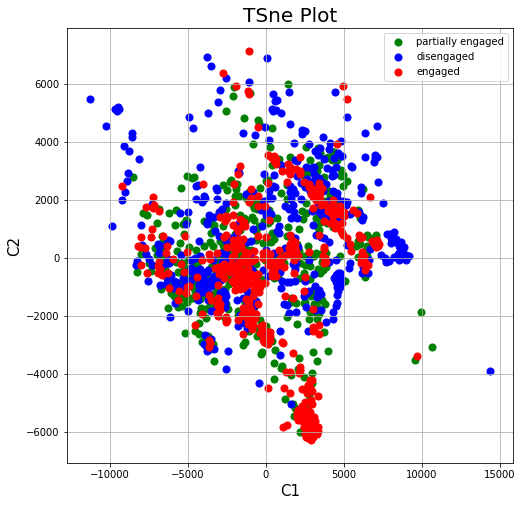

In [59]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('C1', fontsize = 15)
ax.set_ylabel('C2', fontsize = 15)
ax.set_title('TSne Plot', fontsize = 20)
targets = ['disengaged','partially_disengaged','engaged' ]
colors = ['g']
ax.scatter(finalDf.loc[412:823, "C1"]
               , finalDf.loc[412:823, 'C2']
               , c ='green' 
               , s = 50)
ax.scatter(finalDf.loc[0:411, 'C1']
               , finalDf.loc[0:411, 'C2']
               , c ='blue' 
               , s = 50)
ax.scatter(finalDf.loc[824:1235, 'C1']
               , finalDf.loc[824:1235, 'C2']
               , c ='red' 
               , s = 50)
ax.legend(['partially engaged','disengaged','engaged'])
ax.grid()